## using statement

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

## Read data from file

In [2]:
def read_data(path_fake,path_true):
    df_fake=pd.read_csv(path_fake)
    df_true=pd.read_csv(path_true)
    df_fake["label"]="fake"
    df_true["label"]="true"
    df_fake["target"]=0
    df_true["target"]=1

    df=pd.concat([df_fake,df_true],ignore_index=True)
    df = df.sample(frac=1, random_state=42).reset_index(drop=True)
    return df

In [3]:
df=read_data("Fake.csv","True.csv")

## Clean data

In [4]:
def clean_text(text):
    if pd.isnull(text):
        return ""
    text = text.lower()                              # lowercase
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)  # remove URLs
    text = re.sub(r'\@w+|\#','', text)               # remove mentions and hashtags
    text = re.sub(r'[^a-z\s]', '', text)             # remove punctuation and numbers
    text = re.sub(r'\s+', ' ', text).strip()         # remove extra whitespace
    return text

In [5]:
def clean_data(df):
    df['title'] = df['title'].apply(clean_text)
    df['text'] = df['text'].apply(clean_text)

    df["length_text"]=df["text"].apply(len)
    df["length_title"]=df["title"].apply(len)

    df = pd.get_dummies(df, columns=['subject'], drop_first=True)

    return df

In [6]:
clean_df=clean_data(df)

## scatter the text and title length

In [7]:
def scatter_title_text_lenght(df):
    df_0 = df[df['target'] == 0]
    plt.scatter(df_0['length_text'], df_0['length_title'], color='red', label='Target 0')

    # Plot points where target == 1 (green)
    df_1 = df[df['target'] == 1]
    plt.scatter(df_1['length_text'], df_1['length_title'], color='green', label='Target 1')

    # Add labels and legend
    plt.xlabel('Length of Text')
    plt.ylabel('Length of Title')
    plt.title('Text vs Title Length by Target')
    plt.legend()

    # Show plot
    plt.show()

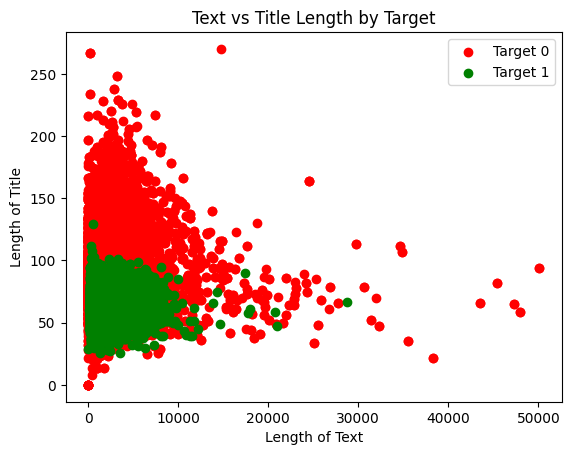

In [8]:
scatter_title_text_lenght(clean_df)